# Encontrando Spark

In [1]:
import findspark
findspark.init('/home/macaubas/spark-3.2.1-bin-hadoop3.2')
import pyspark

# Inicializando Spark

In [2]:
from pyspark.sql import SparkSession 

spark = SparkSession.builder.appName("Basics").getOrCreate()

22/05/10 20:08:33 WARN Utils: Your hostname, macaubas-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
22/05/10 20:08:33 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/10 20:08:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/05/10 20:08:35 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# Básico Spark DataFrames

In [3]:
df = spark.read.json("people.json")

In [4]:
# Visualizando DF
df.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [5]:
# Esquema do DF
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [6]:
# Nome das colunas
df.columns

['age', 'name']

In [7]:
# Estatística descritiva
df.describe().show()

+-------+------------------+-------+
|summary|               age|   name|
+-------+------------------+-------+
|  count|                 2|      3|
|   mean|              24.5|   null|
| stddev|7.7781745930520225|   null|
|    min|                19|   Andy|
|    max|                30|Michael|
+-------+------------------+-------+



# Definindo Schema

In [8]:
from pyspark.sql.types import (StructField, 
                               StringType, 
                               IntegerType, 
                               StructType)

In [9]:
#Criando Schema
data_schema = [StructField('age', IntegerType(), True),
               StructField('name', StringType(), True)]

final_struc = StructType(fields = data_schema)

In [10]:
# Definindo Schema na leitura dos dados
df = spark.read.json('people.json', schema = final_struc)

In [11]:
# Visualizando
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- name: string (nullable = true)



# Selecionando Colunas

In [12]:
# Head
df.head(2)

[Row(age=None, name='Michael'), Row(age=30, name='Andy')]

In [13]:
# Tail
df.tail(2)

[Row(age=30, name='Andy'), Row(age=19, name='Justin')]

In [14]:
# Seleção Única
df.select('age').show()

+----+
| age|
+----+
|null|
|  30|
|  19|
+----+



In [15]:
# Seleção múltipla
df.select(['age','name']).show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



# Criando colunas

In [16]:
# Mudanças temporárias - inplace (necessita reatribuição para mudar)
df.withColumn("double_age", df['age']*2).show()

+----+-------+----------+
| age|   name|double_age|
+----+-------+----------+
|null|Michael|      null|
|  30|   Andy|        60|
|  19| Justin|        38|
+----+-------+----------+



# Renomeando Colunas

In [17]:
# Inplace
df.withColumnRenamed('age','new_age').show()

+-------+-------+
|new_age|   name|
+-------+-------+
|   null|Michael|
|     30|   Andy|
|     19| Justin|
+-------+-------+



# Utilizando SQL

In [18]:
# Registrando como tempView SQL
df.createOrReplaceTempView('people')

In [19]:
results = spark.sql("SELECT * FROM people WHERE age < 25")

results.show()

+---+------+
|age|  name|
+---+------+
| 19|Justin|
+---+------+



In [20]:
results = spark.sql("SELECT * FROM people WHERE age > 25")

results.show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



# Operações Básicas

In [21]:
# Inicializando uma outra sessão
spark = SparkSession.builder.appName('ops').getOrCreate()

In [22]:
# Lendo a base
df = spark.read.csv('appl_stock.csv', 
                    inferSchema = True, 
                    header = True)

In [23]:
# Visualizando
df.show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [24]:
# Melhor visualização das colunas
df.head(1)

[Row(Date='2010-01-04', Open=213.429998, High=214.499996, Low=212.38000099999996, Close=214.009998, Volume=123432400, Adj Close=27.727039)]

In [25]:
# Schema
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



## Usando SQL

In [26]:
df.filter("Close < 500").show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [27]:
df.filter("Close < 500").select(['Date', 'Open']).show()

+----------+------------------+
|      Date|              Open|
+----------+------------------+
|2010-01-04|        213.429998|
|2010-01-05|        214.599998|
|2010-01-06|        214.379993|
|2010-01-07|            211.75|
|2010-01-08|        210.299994|
|2010-01-11|212.79999700000002|
|2010-01-12|209.18999499999998|
|2010-01-13|        207.870005|
|2010-01-14|210.11000299999998|
|2010-01-15|210.92999500000002|
|2010-01-19|        208.330002|
|2010-01-20|        214.910006|
|2010-01-21|        212.079994|
|2010-01-22|206.78000600000001|
|2010-01-25|202.51000200000001|
|2010-01-26|205.95000100000001|
|2010-01-27|        206.849995|
|2010-01-28|        204.930004|
|2010-01-29|        201.079996|
|2010-02-01|192.36999699999998|
+----------+------------------+
only showing top 20 rows



## Utilizando python syntax

In [28]:
df.filter(df['Close'] < 500).select(['Date','Volume']).show()

+----------+---------+
|      Date|   Volume|
+----------+---------+
|2010-01-04|123432400|
|2010-01-05|150476200|
|2010-01-06|138040000|
|2010-01-07|119282800|
|2010-01-08|111902700|
|2010-01-11|115557400|
|2010-01-12|148614900|
|2010-01-13|151473000|
|2010-01-14|108223500|
|2010-01-15|148516900|
|2010-01-19|182501900|
|2010-01-20|153038200|
|2010-01-21|152038600|
|2010-01-22|220441900|
|2010-01-25|266424900|
|2010-01-26|466777500|
|2010-01-27|430642100|
|2010-01-28|293375600|
|2010-01-29|311488100|
|2010-02-01|187469100|
+----------+---------+
only showing top 20 rows



In [29]:
# Múltiplas condições
df.filter( (df['Close'] < 200) & (df['Open'] > 200) ).show()

+----------+------------------+----------+----------+----------+---------+------------------+
|      Date|              Open|      High|       Low|     Close|   Volume|         Adj Close|
+----------+------------------+----------+----------+----------+---------+------------------+
|2010-01-22|206.78000600000001|207.499996|    197.16|    197.75|220441900|         25.620401|
|2010-01-28|        204.930004|205.500004|198.699995|199.289995|293375600|25.819922000000002|
|2010-01-29|        201.079996|202.199995|190.250002|192.060003|311488100|         24.883208|
+----------+------------------+----------+----------+----------+---------+------------------+



In [30]:
# ~ é operador de negação
df.filter( (df['Close'] < 200) & ~(df['Open'] > 200) ).show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-02-01|192.36999699999998|             196.0|191.29999899999999|        194.729998|187469100|         25.229131|
|2010-02-02|        195.909998|        196.319994|193.37999299999998|        195.859997|174585600|25.375532999999997|
|2010-02-03|        195.169994|        200.200003|        194.420004|        199.229994|153832000|25.812148999999998|
|2010-02-04|        196.730003|        198.370001|        191.570005|        192.050003|189413000|         24.881912|
|2010-02-05|192.63000300000002|             196.0|        190.850002|        195.460001|212576700|25.323710000000002|
|2010-02-08|        195.690006|197.88000300000002|      

In [31]:
df.filter(df['Low'] == 197.16).show()

+----------+------------------+----------+------+------+---------+---------+
|      Date|              Open|      High|   Low| Close|   Volume|Adj Close|
+----------+------------------+----------+------+------+---------+---------+
|2010-01-22|206.78000600000001|207.499996|197.16|197.75|220441900|25.620401|
+----------+------------------+----------+------+------+---------+---------+



In [32]:
# Utilizando collect() para ter um objeto row como resultados
row_result = df.filter(df['Low'] == 197.16).collect()
row_result

[Row(Date='2010-01-22', Open=206.78000600000001, High=207.499996, Low=197.16, Close=197.75, Volume=220441900, Adj Close=25.620401)]

In [33]:
# Selecionando atributos da linha
row = row_result[0]

# Como dict
row.asDict()

{'Date': '2010-01-22',
 'Open': 206.78000600000001,
 'High': 207.499996,
 'Low': 197.16,
 'Close': 197.75,
 'Volume': 220441900,
 'Adj Close': 25.620401}

In [34]:
# Extraindo informações
row.asDict().get("Volume")

220441900

# Agregando dados 

## Groupby

In [35]:
# Criando outra sessão
spark = SparkSession.builder.appName('aggs').getOrCreate()

In [36]:
# Carregando dados
df = spark.read.csv("sales_info.csv",
                   inferSchema= True,
                   header = True)

In [37]:
# Visualizando dados
df.show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|    Sam|200.0|
|   GOOG|Charlie|120.0|
|   GOOG|  Frank|340.0|
|   MSFT|   Tina|600.0|
|   MSFT|    Amy|124.0|
|   MSFT|Vanessa|243.0|
|     FB|   Carl|870.0|
|     FB|  Sarah|350.0|
|   APPL|   John|250.0|
|   APPL|  Linda|130.0|
|   APPL|   Mike|750.0|
|   APPL|  Chris|350.0|
+-------+-------+-----+



In [38]:
# Schema
df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Person: string (nullable = true)
 |-- Sales: double (nullable = true)



In [39]:
# Agrupando por média da companhia
df.groupBy("Company").mean().show()

+-------+-----------------+
|Company|       avg(Sales)|
+-------+-----------------+
|   APPL|            370.0|
|   GOOG|            220.0|
|     FB|            610.0|
|   MSFT|322.3333333333333|
+-------+-----------------+



In [40]:
# Agrupando por soma da companhia
df.groupBy("Company").sum().show()

+-------+----------+
|Company|sum(Sales)|
+-------+----------+
|   APPL|    1480.0|
|   GOOG|     660.0|
|     FB|    1220.0|
|   MSFT|     967.0|
+-------+----------+



## Aggregate

In [41]:
# Chamando aggregate
df.agg({'Sales':'sum'}).show()

+----------+
|sum(Sales)|
+----------+
|    4327.0|
+----------+



## Agg e Groupby

In [42]:
grouped_data = df.groupBy("Company")

grouped_data.agg({'Sales': 'mean'}).show()

+-------+-----------------+
|Company|       avg(Sales)|
+-------+-----------------+
|   APPL|            370.0|
|   GOOG|            220.0|
|     FB|            610.0|
|   MSFT|322.3333333333333|
+-------+-----------------+



In [43]:
grouped_data.agg({'Sales': 'min'}).show()

+-------+----------+
|Company|min(Sales)|
+-------+----------+
|   APPL|     130.0|
|   GOOG|     120.0|
|     FB|     350.0|
|   MSFT|     124.0|
+-------+----------+



## Importing Functions

In [44]:
from pyspark.sql.functions import (countDistinct, 
                                   avg, 
                                   stddev)

In [45]:
# Coluna única
df.select(avg('Sales')).show()

+-----------------+
|       avg(Sales)|
+-----------------+
|360.5833333333333|
+-----------------+



In [46]:
# Dados agrupados
sumario = grouped_data.agg(stddev('Sales').alias('Desvio Padrão'),
                 avg('Sales').alias('Média'), 
                 countDistinct('Sales').alias('Únicos'))

sumario.show()

+-------+------------------+-----------------+------+
|Company|     Desvio Padrão|            Média|Únicos|
+-------+------------------+-----------------+------+
|   APPL|  268.824602048746|            370.0|     4|
|   GOOG|111.35528725660043|            220.0|     3|
|     FB| 367.6955262170047|            610.0|     2|
|   MSFT| 247.7182539364698|322.3333333333333|     3|
+-------+------------------+-----------------+------+



## Formatando os dados

In [47]:
from pyspark.sql.functions import format_number

In [48]:
# A forma recomendada para usar alias é ao final de todas as operações
sumario_format = sumario.select([format_number('Desvio Padrão', 2).alias('std'),
                                 format_number('Média', 2).alias('avg'),
                                 'Únicos'])

sumario_format.show()

+------+------+------+
|   std|   avg|Únicos|
+------+------+------+
|268.82|370.00|     4|
|111.36|220.00|     3|
|367.70|610.00|     2|
|247.72|322.33|     3|
+------+------+------+



## Ordenando os dados

In [49]:
# Ascendente
sumario_format.orderBy('std').show()

+------+------+------+
|   std|   avg|Únicos|
+------+------+------+
|111.36|220.00|     3|
|247.72|322.33|     3|
|268.82|370.00|     4|
|367.70|610.00|     2|
+------+------+------+



In [50]:
# Ascendente
sumario_format.orderBy(sumario_format['std'].desc()).show()

+------+------+------+
|   std|   avg|Únicos|
+------+------+------+
|367.70|610.00|     2|
|268.82|370.00|     4|
|247.72|322.33|     3|
|111.36|220.00|     3|
+------+------+------+



# Missing Data

In [51]:
# Inicializando outra sessão
spark = SparkSession.builder.appName('miss').getOrCreate()

# Carregando os dados
df = spark.read.csv('ContainsNull.csv', 
                    header = True, 
                    inferSchema = True)

# Viz
df.show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| null|
|emp2| null| null|
|emp3| null|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [52]:
# Schema
df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sales: double (nullable = true)



## Drop

In [53]:
# Tudo - any
df.na.drop(how = 'any').show() # Existe o how = all - para todos os valores null

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp4|Cindy|456.0|
+----+-----+-----+



In [54]:
# Limiar - Limiar pelo menos 2 valores não null
df.na.drop(thresh = 2).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| null|
|emp3| null|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [55]:
# Limitando para uma única coluna
df.na.drop(how = 'any', subset = ['Sales']).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp3| null|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [56]:
# Limitando para uma múltiplas colunas
df.na.drop(how = 'any', subset = ['Sales', 'Name']).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp4|Cindy|456.0|
+----+-----+-----+



## Interpolar

In [57]:
df.na.fill('FILL VALUE').show()

+----+----------+-----+
|  Id|      Name|Sales|
+----+----------+-----+
|emp1|      John| null|
|emp2|FILL VALUE| null|
|emp3|FILL VALUE|345.0|
|emp4|     Cindy|456.0|
+----+----------+-----+



In [58]:
df.na.fill(0).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John|  0.0|
|emp2| null|  0.0|
|emp3| null|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



**Spark é inteligente suficiente para preencher as colunas apenas em que o valor selecionado matches o datatype**

In [59]:
# Selecionando coluna para preencher
df.na.fill('No name', subset = ['Name']).show()

+----+-------+-----+
|  Id|   Name|Sales|
+----+-------+-----+
|emp1|   John| null|
|emp2|No name| null|
|emp3|No name|345.0|
|emp4|  Cindy|456.0|
+----+-------+-----+



### Preenchendo pela média

In [60]:
from pyspark.sql.functions import mean

In [61]:
mean_sales = df.select(mean(df['Sales'])).collect()[0][0]
mean_sales

400.5

In [62]:
df.na.fill(mean_sales, subset=['Sales']).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John|400.5|
|emp2| null|400.5|
|emp3| null|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



# Datas

In [63]:
# Funções necessárias
from pyspark.sql.functions import (dayofmonth, 
                                   dayofweek, 
                                   month,
                                   weekofyear,
                                   year,
                                   date_format)

# Tipos necessários
from pyspark.sql.types import (DateType, FloatType)

In [64]:
# Inicializando outra sessão
spark = SparkSession.builder.appName('dates').getOrCreate()

#Criando Schema
data_schema = [StructField('Date', DateType(), True),
               StructField('Open', FloatType(), True),
               StructField('High', FloatType(), True),
               StructField('Low', FloatType(), True),
               StructField('Close', FloatType(), True),
               StructField('Volume', IntegerType(), True),
               StructField('Adj Close', FloatType(), True)]

final_struc = StructType(fields = data_schema)

# Carregando os dados
df = spark.read.csv('appl_stock.csv', 
                    header = True, 
                    schema = final_struc)

# Viz
df.head(1)

[Row(Date=datetime.date(2010, 1, 4), Open=213.42999267578125, High=214.5, Low=212.3800048828125, Close=214.00999450683594, Volume=123432400, Adj Close=27.727039337158203)]

In [65]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: float (nullable = true)



In [66]:
# Selecionando
df.select(dayofmonth(df['Date'])).show()

+----------------+
|dayofmonth(Date)|
+----------------+
|               4|
|               5|
|               6|
|               7|
|               8|
|              11|
|              12|
|              13|
|              14|
|              15|
|              19|
|              20|
|              21|
|              22|
|              25|
|              26|
|              27|
|              28|
|              29|
|               1|
+----------------+
only showing top 20 rows



In [67]:
df.select(month(df['Date'])).show()

+-----------+
|month(Date)|
+-----------+
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          2|
+-----------+
only showing top 20 rows



## Média de preço de fechamentos por ano

In [89]:
newdf = df.withColumn("Year", year(df['Date']))
newdf = newdf.groupBy("Year").agg(mean("Close").alias("avg"))
newdf = newdf.select('Year', format_number("avg", 2).alias('avg'))
newdf = newdf.orderBy('Year')

newdf.show()

+----+------+
|Year|   avg|
+----+------+
|2010|259.84|
|2011|364.00|
|2012|576.05|
|2013|472.63|
|2014|295.40|
|2015|120.04|
|2016|104.60|
+----+------+



In [70]:
type(newdf)

pyspark.sql.dataframe.DataFrame

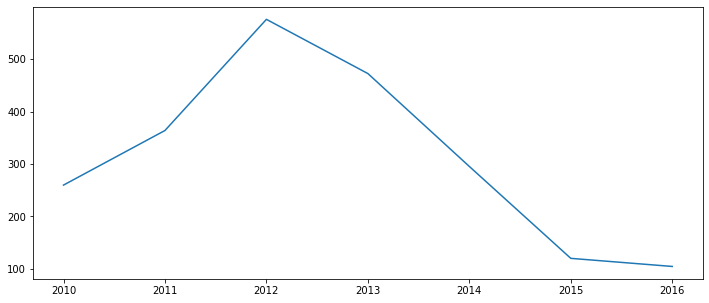

In [103]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,5))

anos = [ano[0] for ano in newdf.select('Year').collect()]
valores = [float(val[0]) for val in newdf.select('avg').collect()]

ax.plot(anos, valores)